# Topics in Model & Evaluation

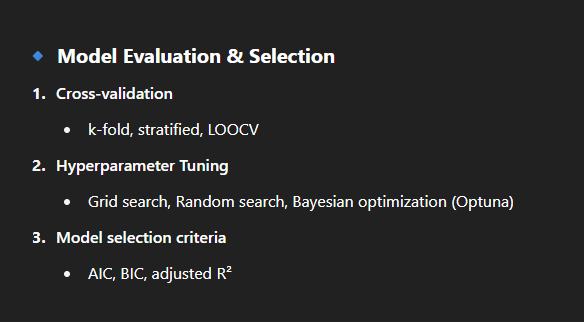

# Cross Validation

## 1. K-Fold

K-Fold Cross Validation is a popular model validation technique used in machine learning to assess how a model will generalize to an independent dataset. It helps in detecting overfitting or underfitting and gives a more reliable estimate of model performance than a single train-test split.

✅ What is K-Fold Cross Validation?

K-Fold Cross Validation splits the entire dataset into K equal (or nearly equal) parts or "folds". The model is trained and validated K times, each time using a different fold as the validation set and the remaining K-1 folds as the training set.

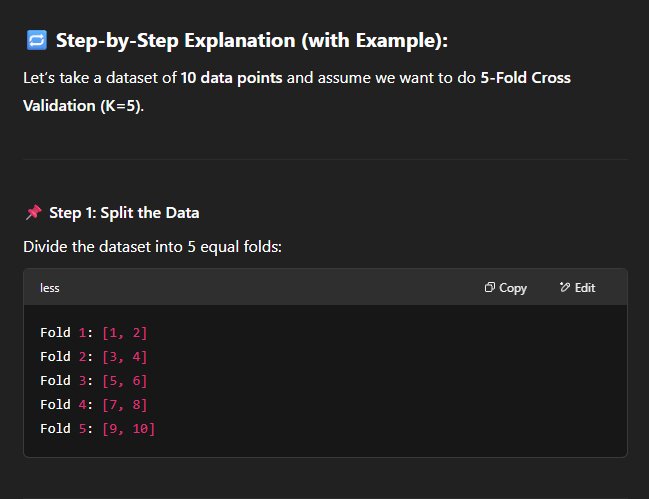

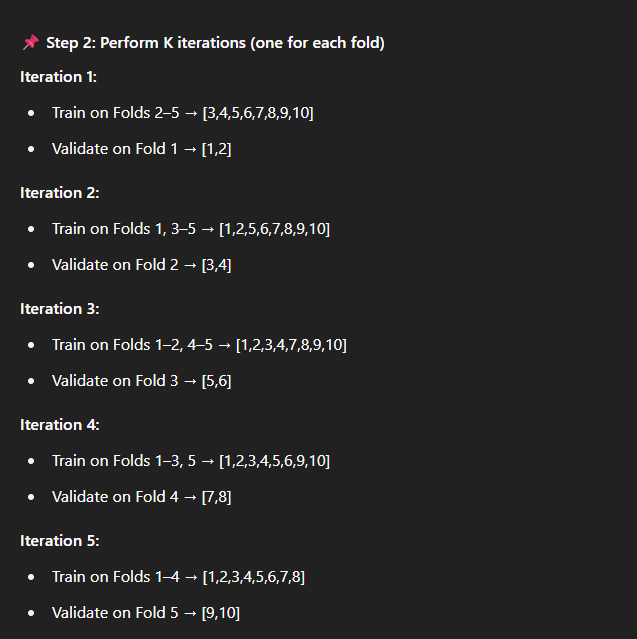

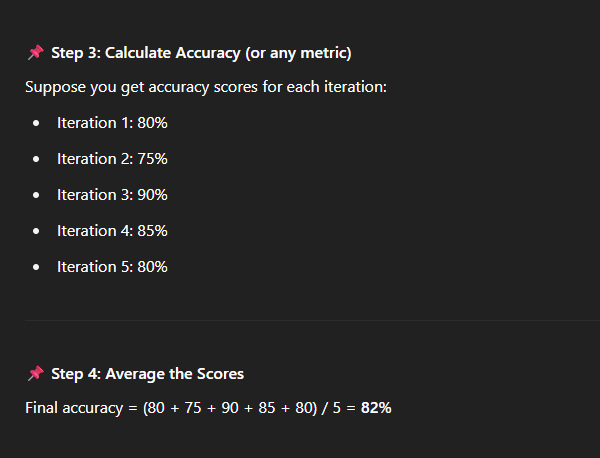

✅ Benefits of K-Fold Cross Validation

1. Utilizes all data for training and validation.

2. Reduces bias from a single train-test split.

3. Helps in better hyperparameter tuning.

🧠 Tip:

A common choice is K=5 or K=10, depending on dataset size. For very small datasets, Leave-One-Out CV (LOOCV) (K=N) is sometimes used.

In [55]:
# Example: 

import pandas as pd
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


# Step 1: Define the dataset

Digits = load_digits()
print(dir(Digits))


# Step 2: Initialize the parameter

x = Digits.data
y = Digits.target


# Step 3: Split the dataset into Train & Test data

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3)


print("\n Training Features:", x_train)
print("\n Training Target:", y_train)
print("\n Testing Features:", x_test)
print("\n Testing Target:", y_test)


# Step 5: Train the data with different Models

# Logistic Regression

LG = LogisticRegression(max_iter=1000)
LG.fit(x_train, y_train)

L_Score = LG.score(x_test,y_test)*100
print('\n Logistic Score :', L_Score)


# SVM

SV = SVC()
SV.fit(x_train, y_train)

SV_Score = SV.score(x_test,y_test)*100
print('\n SVM Score :', SV_Score)


# Random Forest

RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RF_Score = RF.score(x_test,y_test)*100
print('\n Random Forest Score :', RF_Score)




# Step 6: Fold the Dataset using KFold

KF = KFold(n_splits = 5)

for train_index,test_index in KF.split(x):
    print('\n KFold Split:', train_index,test_index)



# Step 7: Perform cross-validation(It can be done by importing cross_val_score)


# Create a Function

def get_score(Model, x_train,x_test,y_train,y_test):
    Model.fit(x_train, y_train)
    return Model.score(x_test,y_test)*100


# Create an array to store the score in each iteration 

Logistic_Score = []
SVM_Score = []
RandomForest_Score = []


for train_index,test_index in KF.split(x):
    
    x_train,x_test,y_train,y_test = x[train_index], x[test_index], \
                                    y[train_index], y[test_index]

    Logistic_Score.append(get_score(LogisticRegression(max_iter = 1000), x_train,x_test,y_train,y_test))
    RandomForest_Score.append(get_score(RandomForestClassifier(), x_train,x_test,y_train,y_test))
    SVM_Score.append(get_score(SVC(), x_train,x_test,y_train,y_test))


# Step 8: Print the score for each model in each iteration

print('\n Logistic Score :', Logistic_Score)
print('\n SVM Score :', SVM_Score)
print('\n RandomForest Score :', RandomForest_Score)



# Step 9:  Final Performance

Average_Performance = np.mean(Logistic_Score)
print('\n Average Logistic Score :', Average_Performance)

Average_Performance1 = np.mean(SVM_Score)
print('\n Average SVM Score :', Average_Performance1)

Average_Performance2 = np.mean(RandomForest_Score)
print('\n Average RandomForest Score :', Average_Performance2)


['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

 Training Features: [[ 0.  0.  7. ...  0.  0.  0.]
 [ 0.  3. 15. ...  0.  0.  0.]
 [ 0.  0.  0. ... 16. 15.  1.]
 ...
 [ 0.  0. 14. ... 14.  2.  0.]
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  1. ...  3.  0.  0.]]

 Training Target: [5 5 6 ... 3 4 9]

 Testing Features: [[ 0.  0.  0. ...  5.  0.  0.]
 [ 0.  0.  0. ...  8.  0.  0.]
 [ 0.  0.  9. ...  4.  0.  0.]
 ...
 [ 0.  0.  1. ...  2.  0.  0.]
 [ 0.  1. 12. ...  0.  0.  0.]
 [ 0.  0.  0. ... 12.  0.  0.]]

 Testing Target: [4 0 0 5 9 3 8 7 2 3 2 6 0 4 9 5 7 6 0 0 8 8 8 5 3 4 8 4 8 7 2 7 9 9 7 0 5
 8 7 9 6 2 0 7 2 7 5 0 7 5 8 1 5 4 9 4 6 3 2 0 5 2 5 6 6 6 8 7 6 2 4 1 1 6
 6 4 1 9 7 6 8 4 8 9 7 8 1 5 6 6 4 2 0 2 3 6 3 3 9 8 2 4 0 1 3 3 4 6 0 6 8
 8 7 1 8 9 4 5 1 0 3 3 3 5 3 1 9 1 8 7 2 7 7 6 6 5 6 3 6 0 4 7 6 9 4 8 5 3
 8 0 2 5 9 1 8 4 4 0 1 9 1 4 8 3 9 6 7 2 5 1 6 9 5 9 1 8 7 6 5 4 0 1 9 5 4
 2 9 7 3 6 8 9 6 9 6 4 6 9 5 3 1 2 2 2 0 2 7 8 9 6 7 6 0 8 2 4 8 

## 2. Stratified K-Fold

Stratified K-Fold Cross Validation is a variation of K-Fold Cross Validation that ensures each fold has approximately the same class distribution as the original dataset. It's especially useful in classification problems with imbalanced classes.

✅ What is Stratified K-Fold Cross Validation?

In standard K-Fold, the data is divided randomly without considering class distribution. Stratified K-Fold ensures that each fold is a mini-representation of the whole dataset, maintaining the percentage of samples for each class.

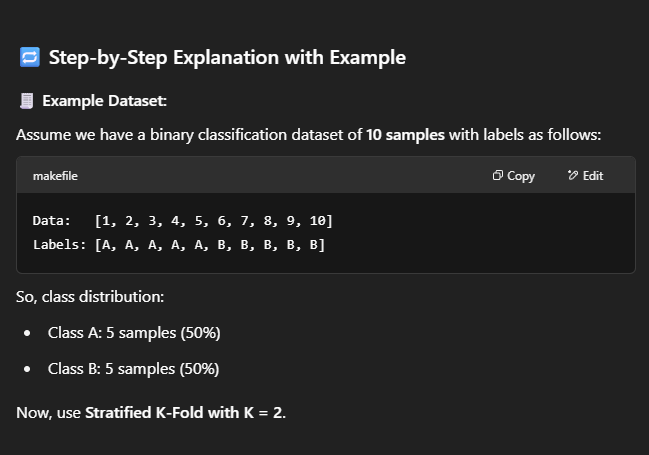

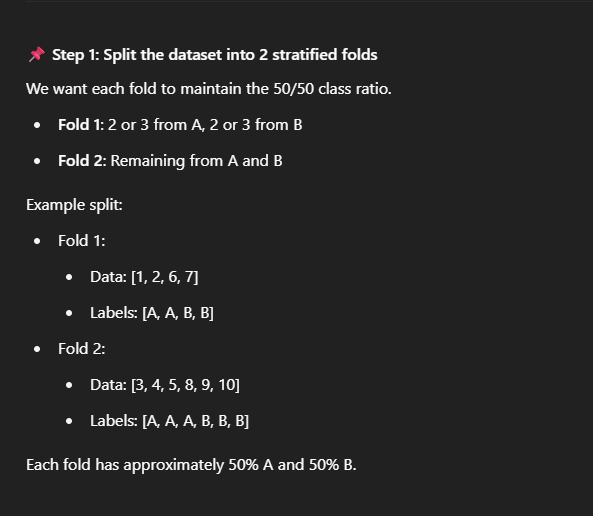

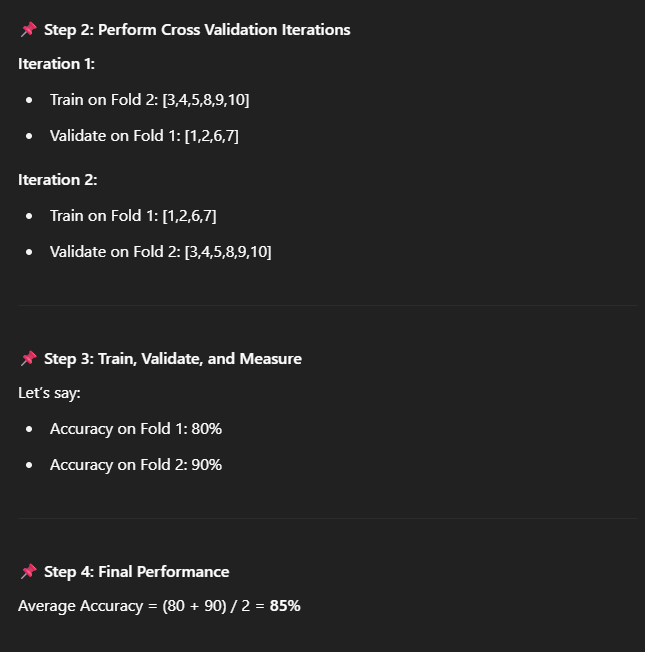

✅ Benefits of Stratified K-Fold:

1. Better for imbalanced datasets.

2. Ensures that minority classes are represented in all folds.

3. Prevents misleading validation scores due to skewed class splits.

✅ Notes:

1. StratifiedKFold ensures class balance in each fold.

2. shuffle=True is important when your data isn't randomly ordered.

3. You can replace RandomForestClassifier with any other model.

In [59]:
# Example:

import pandas as pd
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


# Step 1: Define the dataset

Digits = load_digits()
print(dir(Digits))


# Step 2: Initialize the parameter

x = Digits.data
y = Digits.target


# Step 3: Split the dataset into Train & Test data

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3)


print("\n Training Features:", x_train)
print("\n Training Target:", y_train)
print("\n Testing Features:", x_test)
print("\n Testing Target:", y_test)


# Step 5: Train the data with different Models

# Logistic Regression

LG = LogisticRegression(max_iter=1000)
LG.fit(x_train, y_train)

L_Score = LG.score(x_test,y_test)*100
print('\n Logistic Score :', L_Score)


# SVM

SV = SVC()
SV.fit(x_train, y_train)

SV_Score = SV.score(x_test,y_test)*100
print('\n SVM Score :', SV_Score)


# Random Forest

RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RF_Score = RF.score(x_test,y_test)*100
print('\n Random Forest Score :', RF_Score)




# Step 6: Fold the Dataset using Stratified KFold

SKF = StratifiedKFold(n_splits = 5)

for train_index,test_index in SKF.split(x,y):
    print('\n Stratified KFold Split:', train_index,test_index)



# Step 7: Perform cross-validation

SKF_L_Score = cross_val_score(LogisticRegression(max_iter=1000), x,y)
print('\n Stratified Logistic Score :', SKF_L_Score)

SKF_RF_Score = cross_val_score(RandomForestClassifier(), x,y)
print('\n Stratified Random Forest :', SKF_RF_Score)

SKF_SVC_Score = cross_val_score(SVC(), x,y)
print('\n Stratified SVM Score :', SKF_SVC_Score)


# Step 8:  Final Performance

Average_Performance = np.mean(SKF_L_Score)*100
print('\n Average Logistic Score :', Average_Performance)

Average_Performance1 = np.mean(SKF_SVC_Score)*100
print('\n Average SVM Score :', Average_Performance1)

Average_Performance2 = np.mean(SKF_RF_Score)*100
print('\n Average RandomForest Score :', Average_Performance2)


['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

 Training Features: [[ 0.  0.  9. ...  5.  0.  0.]
 [ 0.  0.  8. ... 16. 11.  1.]
 [ 0.  0.  8. ... 16. 15.  2.]
 ...
 [ 0.  0.  6. ...  0.  0.  0.]
 [ 0.  0.  3. ... 15.  0.  0.]
 [ 0.  0.  6. ...  1.  0.  0.]]

 Training Target: [5 9 2 ... 7 6 5]

 Testing Features: [[ 0.  0.  0. ... 16.  9.  0.]
 [ 0.  1.  8. ... 12.  4.  0.]
 [ 0.  0.  2. ...  0.  0.  0.]
 ...
 [ 0.  1. 13. ...  3.  0.  0.]
 [ 0.  0.  7. ...  3.  0.  0.]
 [ 0.  1. 15. ...  0.  0.  0.]]

 Testing Target: [6 3 8 1 9 3 9 3 8 0 6 4 4 8 2 1 2 3 3 7 1 5 2 4 6 1 1 5 5 7 3 0 2 8 4 4 1
 7 0 8 9 8 4 2 0 6 7 3 4 6 7 2 3 0 6 3 8 4 7 7 7 8 4 4 3 1 6 8 7 0 9 8 6 7
 4 5 7 9 9 7 1 5 0 3 2 5 8 3 7 7 9 1 1 2 2 4 9 3 5 9 5 5 7 3 6 9 5 2 8 0 6
 6 2 8 9 9 7 0 8 9 4 5 2 3 1 2 3 1 5 2 1 5 2 9 0 3 4 8 8 5 6 7 5 7 8 3 2 6
 9 4 5 8 2 1 1 1 9 9 0 5 8 1 7 1 4 3 1 2 7 3 1 2 4 6 5 1 9 9 9 4 0 4 7 5 5
 7 5 5 4 1 8 1 8 3 2 4 6 0 0 3 0 4 0 5 9 2 9 0 2 2 4 2 4 1 3 4 2 

#  Hyper parameter Tuning

Hyperparameters are the parameters set before training (e.g., number of trees in a Random Forest, learning rate in XGBoost).

Tuning means finding the combination that gives the best model performance

## 1. Grid Search

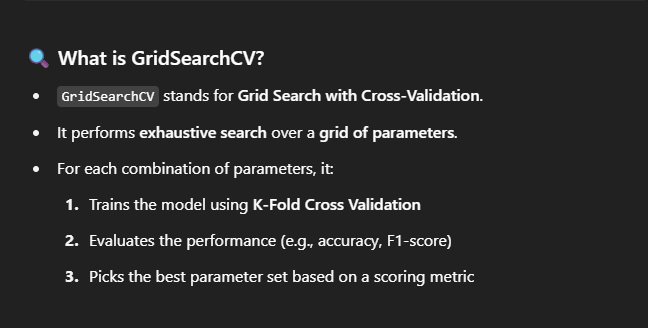

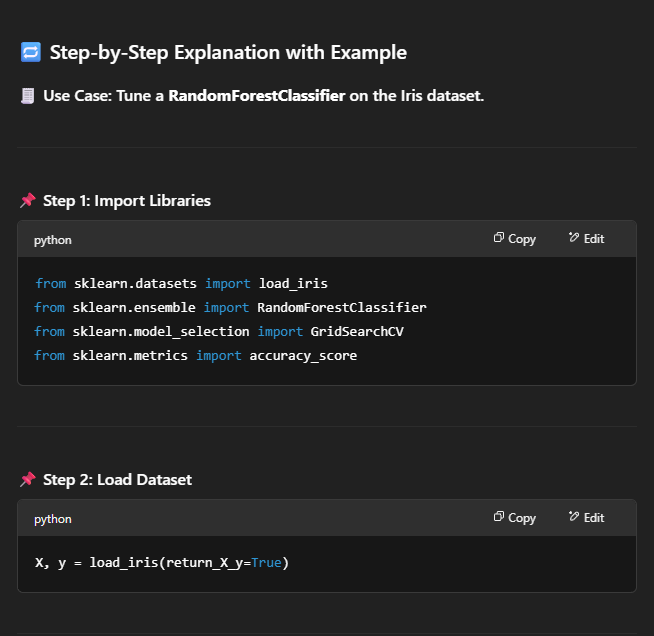

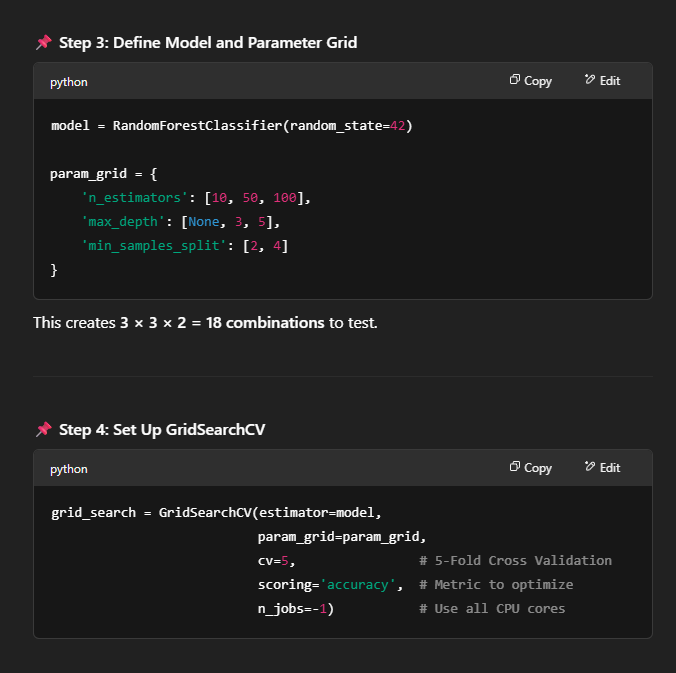

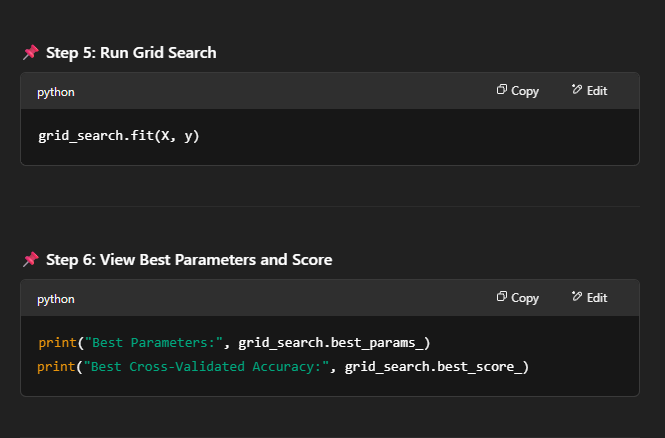

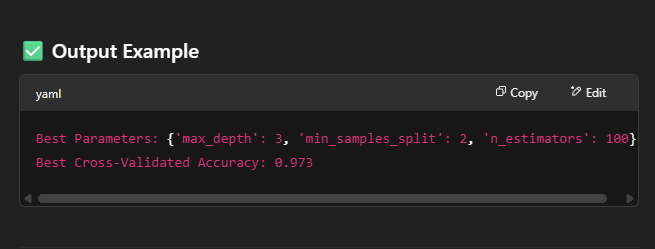

📝 Notes:

1. cv=5 means 5-fold cross-validation is used for each parameter combination.

2. You can also use scoring='f1', roc_auc, etc., depending on your problem.

3. You can access all results via grid_search.cv_results_.

✅ When to Use GridSearchCV:

1. When you want systematic, exhaustive hyperparameter tuning.

2. When model performance is sensitive to parameter choice.

3. For small to medium parameter grids.

In [66]:
# Example: How to hyper-tune machine learning model parameters and choose the best model.


import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV



# Step 1: Define the Datasets

iris = load_iris()
print(dir(iris))


df = pd.DataFrame(iris.data, columns = iris.feature_names)

df['Target'] = iris.target

print('\n', df.head())


# Step 2: Initialize the parameters

x = df.drop('Target', axis = 'columns')
y = df.Target



# Step 3: Split the Datasets to Train & Test

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3)


print("\n Training Features:", x_train.head())
print("\n Training Target:", y_train.head())
print("\n Testing Features:", x_test.head())
print("\n Testing Target:", y_test.head())



# Step 3: Train the Datasets using SVM

SVM = SVC()
SVM.fit(x_train,y_train)


# Evaluate the model

Score = SVM.score(x_test,y_test)*100
print("\n Accuracy of SVM :", Score)




# Step 4: Define Model and Parameter Grid


model = SVC()

parameter = {

    'C' : [1, 10, 20],
    
    'kernel' : ['rbf', 'linear'] 
}


# Step 5: Set Up GridSearchCV


Grid_Search = GridSearchCV( estimator = model,
                           param_grid = parameter,
                           cv =5,  # 5-Fold Cross Validation       
                          return_train_score = False)


Grid_Search.fit(x,y)

print('\n Grid Results :', Grid_Search.cv_results_)



# Step 6: Create a Dataframe with the results

Grid_df = pd.DataFrame(Grid_Search.cv_results_)
print('\n', Grid_df.head())


Grid_df = Grid_df[['param_C','param_kernel','mean_test_score']]
print('\n', Grid_df.head())


# Best Score

BS = Grid_Search.best_score_
print('\n Best Score in Grid Search :',BS*100)

# Best parameter

BP = Grid_Search.best_params_
print('\n Best Parameter in Grid Search :',BP)



['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  

 Training Features:      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
137                6.4               3.1                5.5               1.8
15                 5.7               4.4                1.5               0.4
2                  4.7               3.2                1.3               0.2
89                 5.

In [84]:
# How about different models with different hyperparameters?

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# Step 1: Define Model and Parameter Grid

Model_param = {

    'SVM' : {

        'model' : SVC(), 
        'parameter' : {
            'C' : [1, 10, 20],
            'kernel' : ['rbf', 'linear']
            
        }
        
    },

    'RandomForest' : {

        'model' : RandomForestClassifier(), 
        'parameter' : {
            'n_estimators' : [1, 5, 10]
                       
        }
        
    },

    'LogisticRegression' : {
        'model': LogisticRegression(solver='liblinear'),
        'parameter': {
            'C': [1,5,10]
        }
    }

    
}




# Step 2: Set Up GridSearchCV

scores = []

for model_name, mp in Model_param.items():
    clf =  GridSearchCV(mp['model'], mp['parameter'], cv=5, return_train_score=False)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_*100,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(df)



                model  best_score                   best_params
0                 SVM   98.000000  {'C': 1, 'kernel': 'linear'}
1        RandomForest   96.000000           {'n_estimators': 1}
2  LogisticRegression   96.666667                      {'C': 5}


## 2. Random Search 

RandomizedSearchCV is a hyperparameter tuning technique that randomly samples combinations of hyperparameters from a specified distribution, rather than trying all combinations like GridSearchCV. It's useful when:

1. The parameter search space is large

2. You want faster tuning with fewer evaluations

3. Not all parameter combinations are equally likely to be good



✅ Why is RandomizedSearchCV?

It selects random combinations of hyperparameters from a grid or distribution.

You specify the number of iterations (i.e., how many combinations to test).

It still uses cross-validation to evaluate each combination.

It's more efficient than GridSearchCV when you don't need to test all combinations.

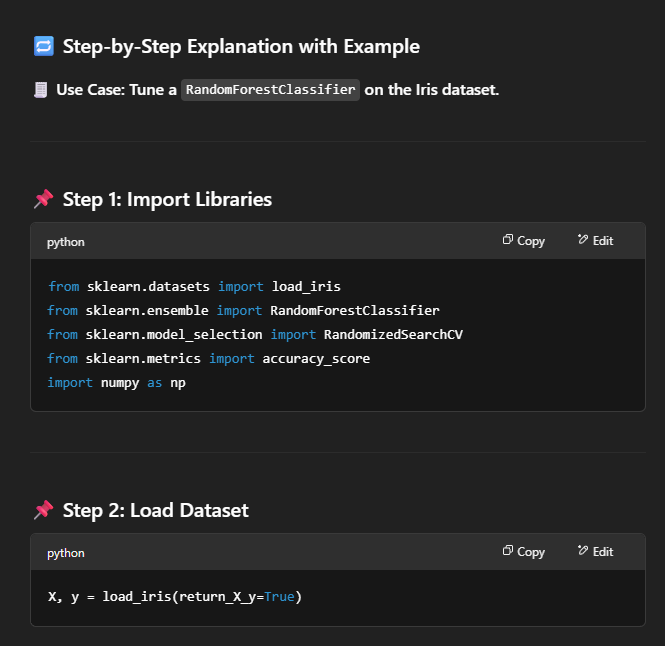

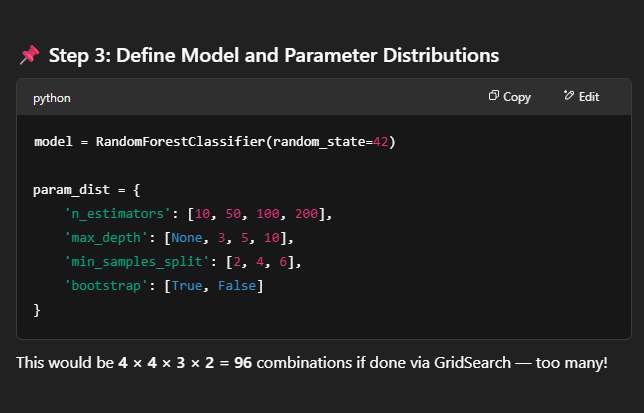

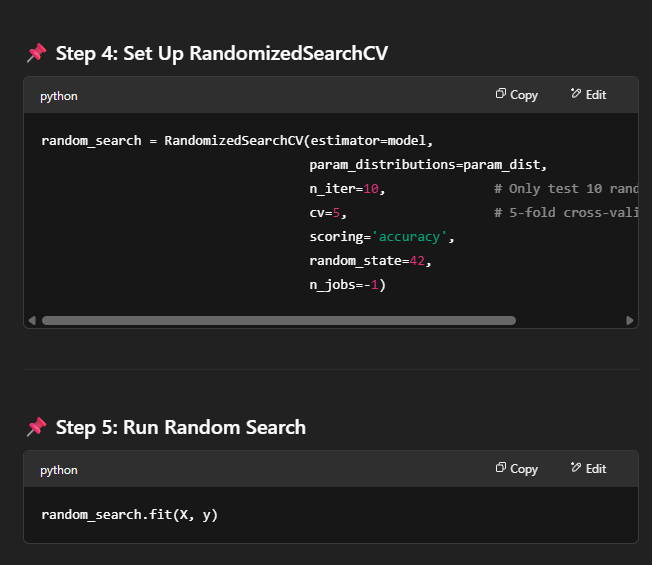

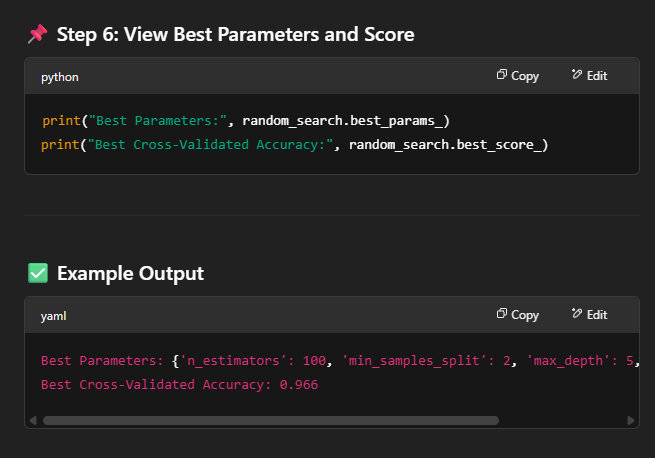

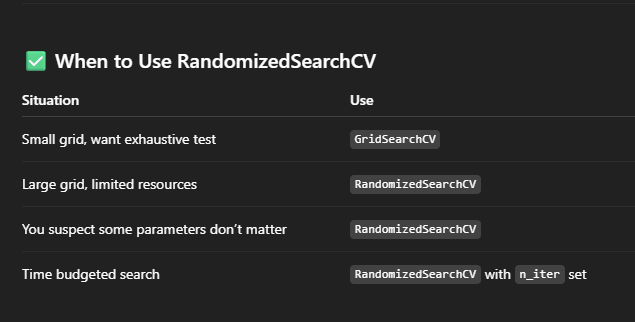

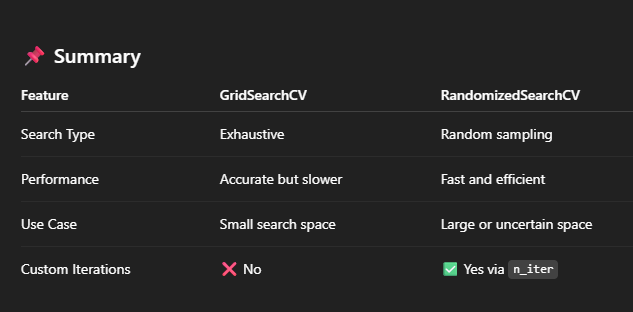

In [70]:
# Example: How to hyper-tune machine learning model parameters and choose the best model.


import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV



# Step 1: Define the Datasets

iris = load_iris()
print(dir(iris))


df = pd.DataFrame(iris.data, columns = iris.feature_names)

df['Target'] = iris.target

print('\n', df.head())


# Step 2: Initialize the parameters

x = df.drop('Target', axis = 'columns')
y = df.Target



# Step 3: Split the Datasets to Train & Test

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3)


print("\n Training Features:", x_train.head())
print("\n Training Target:", y_train.head())
print("\n Testing Features:", x_test.head())
print("\n Testing Target:", y_test.head())



# Step 3: Train the Datasets using SVM

SVM = SVC()
SVM.fit(x_train,y_train)


# Evaluate the model

Score = SVM.score(x_test,y_test)*100
print("\n Accuracy of SVM :", Score)




# Step 4: Define Model and Parameter Grid


model = SVC()

parameter = {

    'C' : [1, 10, 20],
    
    'kernel' : ['rbf', 'linear'] 
}


# Step 5: Set Up GridSearchCV


Random_Search = RandomizedSearchCV( estimator = model,
                           param_distributions = parameter,
                           cv =5,  # 5-Fold Cross Validation       
                           return_train_score = False,
                           n_iter=3) # Only test 3 random combinations


Random_Search.fit(x,y)

print('\n Random Results :', Random_Search.cv_results_)



# Step 6: Create a Dataframe with the results

Grid_df = pd.DataFrame(Random_Search.cv_results_)
print('\n', Grid_df.head())


Random_df = Grid_df[['param_C','param_kernel','mean_test_score']]
print('\n', Grid_df.head())


# Best Score

BS = Random_Search.best_score_
print('\n Best Score in Random Search :',BS*100)

# Best parameter

BP = Random_Search.best_params_
print('\n Best Parameter in Random Search :',BP)


['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  

 Training Features:      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
66                 5.6               3.0                4.5               1.5
40                 5.0               3.5                1.3               0.3
79                 5.7               2.6                3.5               1.0
74                 6.

In [88]:
# How about different models with different hyperparameters?

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# Step 1: Define Model and Parameter Grid

Model_param = {

    'SVM' : {

        'model' : SVC(), 
        'parameter' : {
            'C' : [1, 10, 20],
            'kernel' : ['rbf', 'linear']
            
        }
        
    },

    'RandomForest' : {

        'model' : RandomForestClassifier(), 
        'parameter' : {
            'n_estimators' : [1, 5, 10]
                       
        }
        
    },

    'LogisticRegression' : {
        'model': LogisticRegression(solver='liblinear'),
        'parameter': {
            'C': [1,5,10]
        }
    }

    
}




# Step 2: Set Up RandomSearchCV

scores = []

for model_name, mp in Model_param.items():
    clf =  RandomizedSearchCV(mp['model'], mp['parameter'], cv=5, return_train_score=False,n_iter=3)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_*100,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(df)



                model  best_score                   best_params
0                 SVM   98.000000  {'kernel': 'linear', 'C': 1}
1        RandomForest   96.000000           {'n_estimators': 5}
2  LogisticRegression   96.666667                      {'C': 5}
